# Load Data and Visulize

In [1]:
import pandas as pd 

train = pd.read_csv('Data\sign_mnist_train.csv')
valid = pd.read_csv('Data\sign_mnist_valid.csv')

y_train = train['label']
y_valid = valid['label']
del train['label']
del valid['label']


In [2]:
x_train = train.values
x_valid = valid.values
valid.shape

(7172, 784)

In [3]:
train.shape

(27455, 784)

In [4]:
# visualize data 
import matplotlib.pyplot as plt 

plt.figure(figsize = (40, 40))

def visualize_data(num_image): 

    for i in range(num_image): 
        row = x_train[i]
        label = y_train[i]

        image = row.reshape(28, 28)
        plt.subplot(1, num_image, i+1)
        plt.title(label, fontdict={'fontsize': 30})
        plt.axis('off')
        plt.imshow(image, cmap='gray')




<Figure size 4000x4000 with 0 Axes>

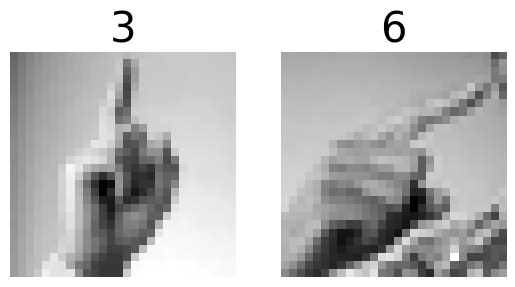

In [5]:
visualize_data(2)

# Data Preprocessing 

## Normalize data 

In [6]:
x_train = x_train / 255
x_valid = x_valid / 255


## Categorical data

In [7]:
import tensorflow.keras as keras

num_classes = 24 

if not y_train.shape[-1] == 24: 
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_valid = keras.utils.to_categorical(y_valid, num_classes)


# Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(units = 512, activation = 'relu', input_shape = (784,)))
model.add(Dense(units=512, activation ='relu'))
model.add(Dense(units=512, activation='softmax'))

model.summary()

d:\WorkSpace_Trung\AI\Hand-on-ML\ml_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 927,232 (3.54 MB)

 Trainable params: 927,232 (3.54 MB)

 Non-trainable params: 0 (0.00 B)

## Add another layer 

In [10]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_valid = x_valid.reshape(-1, 28, 28, 1)

- Kiến trúc mạng hiện tại : </br>
        <img src="Data/cnn.png" width=180 />

In [11]:
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D, 
    Flatten, 
    Dropout,
    BatchNormalization
) 

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))


d:\WorkSpace_Trung\AI\Hand-on-ML\ml_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 75)     │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 75)     │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 50)     │        33,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 50)     │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 25)       │        11,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 25)       │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 25)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       205,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 24)             │        12,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,049 (1.01 MB)

 Trainable params: 263,749 (1.01 MB)

 Non-trainable params: 300 (1.17 KB)

## Thông tin về một số mạng cơ bản
- **Dense** : mạng kết nối toàn bộ giá trị vào với mỗi nút 
- **Batch Normalize** : lớp chuẩn hóa giá trị đầu vào, giảm input tại hidden layer mỗi lần huấn luyện
- **MaxPool** : lấy giá trị lớn nhất để giảm chiều ma trận 
- **Dropout** : loại bỏ một số node để tránh overfitting


# Data Augmentation 

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)  

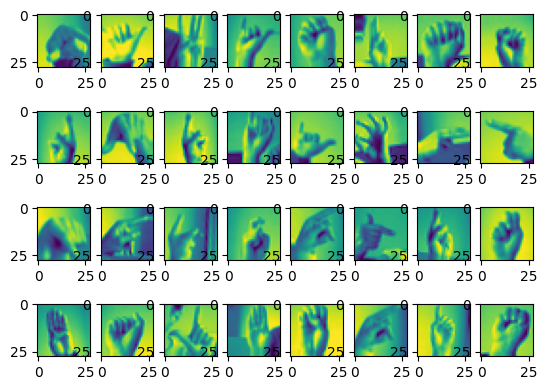

In [16]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = next(img_iter) 
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [17]:
datagen.fit(x_train)

In [26]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy']) 
model.fit(img_iter,
          epochs=10,
          steps_per_epoch=len(x_train)//batch_size, # Run same number of steps we would if we were not using a generator.
          validation_data=(x_valid, y_valid))

Epoch 1/10


d:\WorkSpace_Trung\AI\Hand-on-ML\ml_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


857/857 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.4664 - loss: 1.7727 - val_accuracy: 0.8986 - val_loss: 0.2905
Epoch 2/10
  1/857 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9375 - loss: 0.1745

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9375 - loss: 0.1745 - val_accuracy: 0.8859 - val_loss: 0.3406
Epoch 3/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.8756 - loss: 0.3660 - val_accuracy: 0.9117 - val_loss: 0.2376
Epoch 4/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9062 - loss: 0.4409 - val_accuracy: 0.7918 - val_loss: 0.5489
Epoch 5/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.9289 - loss: 0.2160 - val_accuracy: 0.9152 - val_loss: 0.2402
Epoch 6/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9375 - loss: 0.3456 - val_accuracy: 0.8823 - val_loss: 0.3511
Epoch 7/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.9490 - loss: 0.1606 - val_accuracy: 0.9766 - val_loss: 0.0645
Epoch 8/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9375 - loss: 0.1577 - val_accuracy: 0.9870 - val_loss: 0.0455
Epoch 9/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.9598 - loss: 0.1327 - val_accuracy: 0.955

# Prediction

In [27]:
import matplotlib.image as mpimg
def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image, cmap='gray')

In [28]:
from tensorflow.keras.preprocessing import image as image_utils
def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, color_mode="grayscale", target_size=(28,28))
    return image

alphabet = "abcdefghiklmnopqrstuvwxy"

In [29]:
def predict_letter(file_path):
    # Show image
    show_image(file_path)
    # Load and scale image
    image = load_and_scale_image(file_path)
    # Convert to array
    image = image_utils.img_to_array(image)
    # Reshape image
    image = image.reshape(1, 28,28,1)
    # Normalize image
    image = image/255
    # Make prediction
    prediction = model.predict(image)
    # Convert prediction to letter
    predicted_letter = alphabet[np.argmax(prediction)]
    # Return prediction
    return predicted_letter   

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


'b'

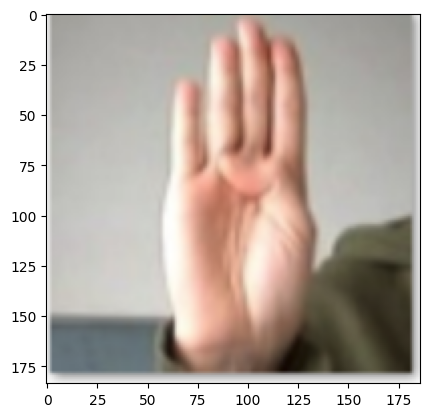

In [32]:
predict_letter('Data\\test.png')